# Math 428 - Final Exam
## Problem 1
### Part A
Evaluate $$\int_{0}^{4}x(1-x)e^{-x}dx$$ with $n$ applications of the trapezoidal rule. Use $n=5, 10, 20$.

#### Graphing function & setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import warnings
warnings.filterwarnings("ignore")
colors = ["red", "blue", "green", "gray", "purple", "orange"]
# Generic Function to create a plot
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], num_rows=1, size=(16, 12)):
    plt.figure(figsize=size, dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(
        zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            plt.plot(x_vals, y_v, label=t, color=colors[c2+c], alpha=0.70)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='lower right')
    
    plt.show()

#### Trapezoidal approximation implementation

In [2]:
def trapezoid_rule(f_x, x_start, x_end, num_divs):
    integral = f_x(x_start) + f_x(x_end)
    dx = (x_end - x_start) / num_divs
    for i in np.arange(1, num_divs):
        x_val = x_start + i * dx
        integral += 2 * f_x(x_val)
        
    return (integral * (x_end - x_start) / (2 * num_divs))

#### Function defintion of the integral

In [3]:
def f_x(x):
    return x * (1 - x) * np.exp(-x)

#### Evaluate with the three different number of steps

In [4]:
n5  = trapezoid_rule(f_x, 0, 4, 5)
n10 = trapezoid_rule(f_x, 0, 4, 10)
n20 = trapezoid_rule(f_x, 0, 4, 20)

print ("n = 5:  %.4f\nn = 10: %.4f\nn = 20: %.4f" % (n5, n10, n20))

n = 5:  -0.6589
n = 10: -0.6272
n = 20: -0.6184


### Part B
$$\int_{0}^{4}x(1-x)e^{-x}dx=\int_{0}^{4}xe^{-x}-x^2e^{-x}dx$$
Performing integration by parts on the second part of the integrand:
$$u_1=x^2, dv_1=e^{-x}dx$$
$$du_1=2xdx, v_1=-e^{-x}$$
$$\int_{0}^{4}xe^{-x}-x^2e^{-x}dx=\int_{0}^{4}xe^{-x}dx-((-x^2e^{-x})|_0^4-\int_{0}^{4}-2xe^{-x}dx)$$
$$\int_{0}^{4}xe^{-x}dx-((-x^2e^{-x})|_0^4-\int_{0}^{4}-2xe^{-x}dx)=\int_{0}^{4}xe^{-x}dx+(x^2e^{-x})|_0^4-\int_{0}^{4}2xe^{-x}dx$$
$$\int_{0}^{4}xe^{-x}dx+(x^2e^{-x})|_0^4-\int_{0}^{4}2xe^{-x}dx=(x^2e^{-x})|_0^4-\int_{0}^{4}xe^{-x}dx$$
Performing a _second_ integration by parts:
$$u_2=x, dv_2=e^{-x}dx$$
$$du_2=dx, v_2=-e^{-x}$$
$$(x^2e^{-x})|_0^4-\int_{0}^{4}xe^{-x}dx=(x^2e^{-x})|_0^4-((-xe^{-x})|_0^4-\int_{0}^{4}-e^{-x}dx)$$
$$(x^2e^{-x})|_0^4-((-xe^{-x})|_0^4-\int_{0}^{4}-e^{-x}dx)=(x^2e^{-x})|_0^4+(xe^{-x})|_0^4+(e^{-x})|_0^4$$
Evaluating the bounds of each of these expressions:
$$(x^2e^{-x})|_0^4+(xe^{-x})|_0^4+(e^{-x})|_0^4=4^2e^{-4}+4e^{-4}+e^{-4}-e^0$$
$$4^2e^{-4}+4e^{-4}+e^{-4}-e^0=21e^{-4}-1$$
This can be directly computed as...
$$\int_{0}^{4}x(1-x)e^{-x}dx\approx -0.61537158...$$
This value can be compared with the trapezoidal approximation of the integral with $n=20$ to obtain the approximate truncation error.

#### Computation of the local truncation error

In [5]:
print ("The estimated local truncation error is %.4f" %
       (21*np.exp(-4)-1-n20))

The estimated local truncation error is 0.0030


### Part C
#### Finding a more accurate approximation of the integral with Richardson Extrapolation
Richardson extrapolation is defined as the following:
$$I\approx \frac{4}{3}I(h_2)-\frac{1}{3}I(h_1)$$
This can be used with the results of the integration from __Part A__ specifically with $n=10$, and $n=20$.
$$I\approx \frac{4}{3}(-0.6184)-\frac{1}{3}(-0.6272)$$
$$I\approx -0.8245+0.2061\approx -0.6155$$
This value is (clearly) more accurate than the either of the original approximations. With a local truncation error of...

In [6]:
rich_extrap = 4/3 * n20 - 1/3 * n10
print ("The new estimated local truncation error is %.4f" %
       (21*np.exp(-4)-1-rich_extrap))

The estimated local truncation error is 0.0001


## Problem 2
### Part A
Solve the following ODE between the bounds of $0\leq x\leq 6$ with $y(0)=1$.
$$\frac{dy}{dx}=x^2-y^2$$

#### Function implementation of the Euler Method of approximating ODE's

In [7]:
def euler_ode(dy_dx, initial=[0, 0], x_bounds=[0, 0], h=0.1):
    x, y = [initial[0]], [initial[1]]
    for i in range(1, int((x_bounds[1] - x_bounds[0]) / h) + 1):
        x_n, y_n = x[-1], y[-1]
        k1 = h * dy_dx(x_n, y_n)
        x.append(x_bounds[0] + i * h)
        y.append(y_n + k1)
        
    return x, y

#### Function implementation of the ordinary differential equation

In [8]:
def dy_dx(x, y):
    return x * x - y * y

#### Compute the Euler approximation for the step sizes of $h=0.4$ and $h=0.2$, plot the results

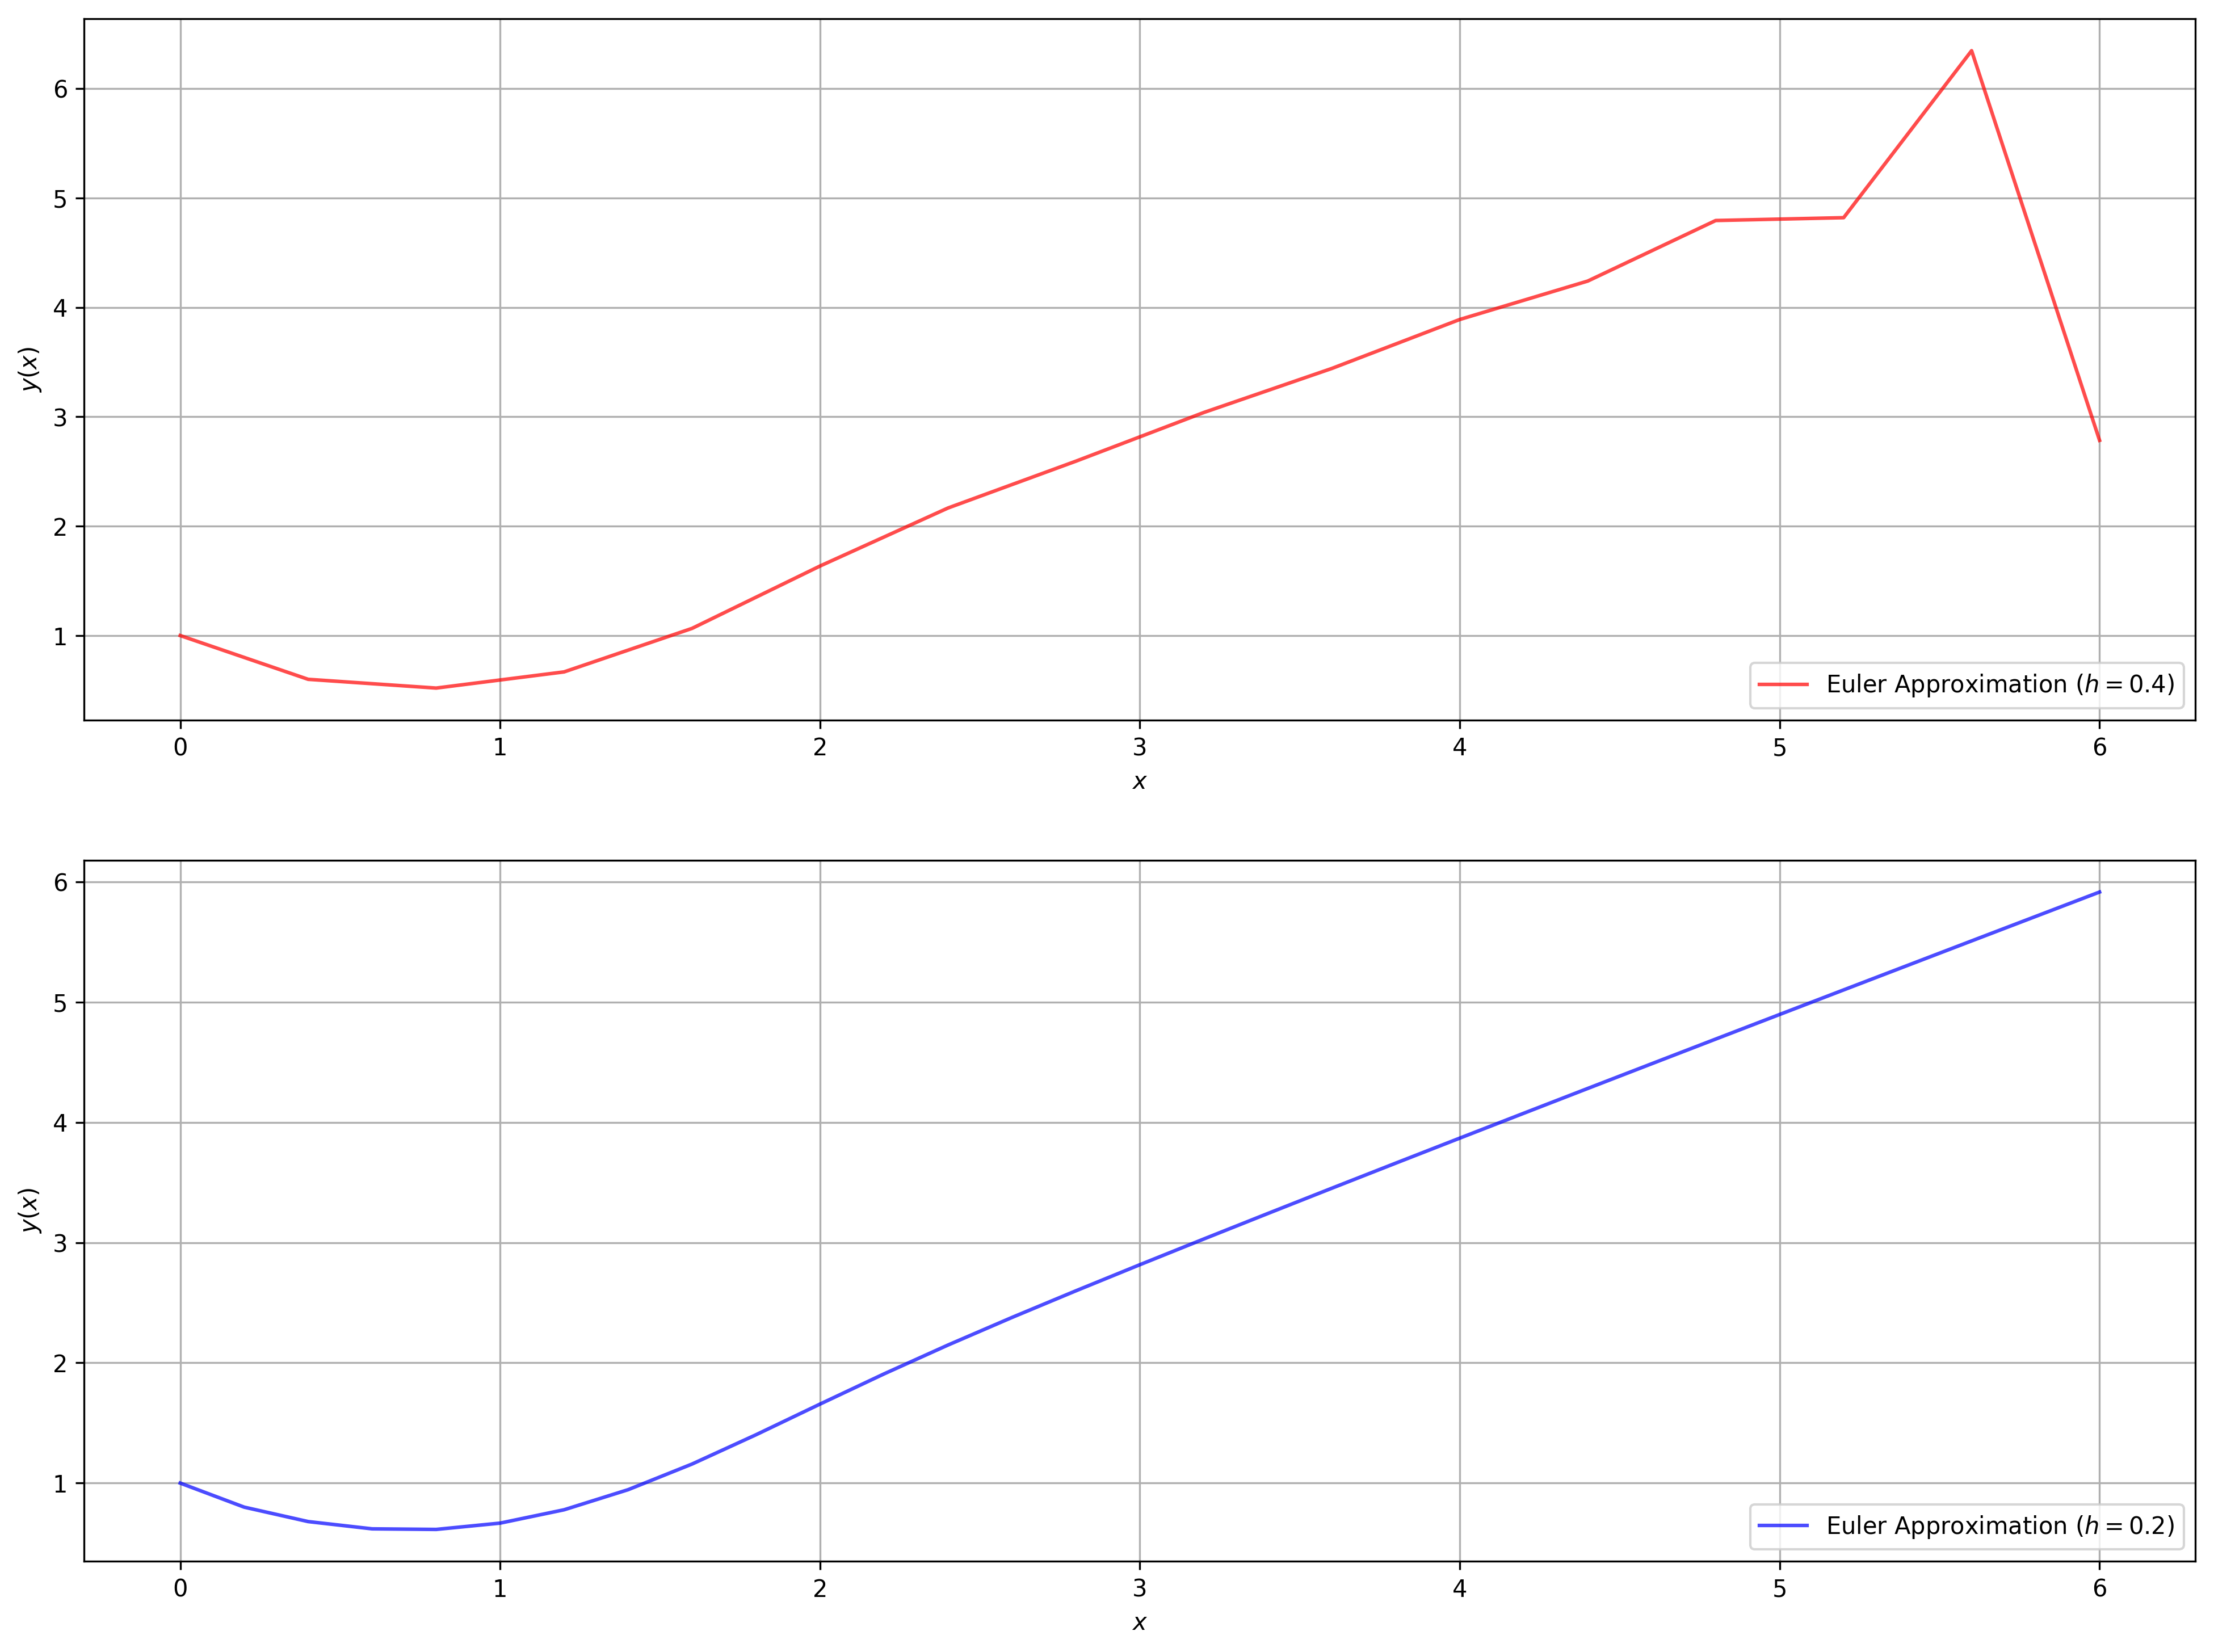

In [9]:
e_04_x, e_04_y = euler_ode(dy_dx, initial=[0, 1], x_bounds=[0, 6], h=0.4)
e_02_x, e_02_y = euler_ode(dy_dx, initial=[0, 1], x_bounds=[0, 6], h=0.2)

create_plot([e_04_x, e_02_x], [(e_04_y, ), (e_02_y, )], ["$x$", "$x$"],
            ["$y(x)$", "$y(x)$"], [("Euler Approximation ($h=0.4$)", ),
                                   ("Euler Approximation ($h=0.2$)", )], 2)

### Part B
As the first plot clearly demonstrates, the step size of $h\approx 0.4$ is less numerically stable than the other step size. This can be explicitly proved by looking at the maximum step size:

$$h_{max}=\frac{-2}{\frac{\partial f}{\partial y}}$$

$$h_{max}=\frac{-2}{-2y}$$

$$h_{max}=\frac{1}{y}$$

Since we are using a fixed step size of $0.4$, the y value at which this function becomes numerically unstable is computed as:

$$0.4=\frac{1}{y}$$

$$y=\frac{1}{0.4}=2.5$$

This is in line with the observed euler approximation from __Part A__. At a y value above 2.5 (for this step size) the result is increasingly numerically unstable. The reason the effect of this instability is only prevalent at larger values of y is because the instability is more pronounced for larger values of y.

### Part C

#### Function to visualize the slope field of the given differential equation

In [10]:
def slope_field(dy_dx, x_bounds=[-10,10], y_bounds=[-10, 10], spacing=1, sol=None):
    x = np.linspace(x_bounds[0], x_bounds[1], (x_bounds[1]-x_bounds[0])/spacing)
    y = np.linspace(y_bounds[0], y_bounds[1],(y_bounds[1]-y_bounds[0])/spacing)
    
    plt.figure(figsize=(15, 8), dpi=250)
    # Generate the slope field
    for i in x:
        for j in y:
            slope = dy_dx(i, j)
            dx = np.sqrt(spacing/100/(1+(slope * slope)))
            dy = dx * slope
            sub_x = np.linspace(i-dx, i+dx, 2)
            sub_y = np.linspace(j-dy, j+dy, 2)
            plt.plot(sub_x, sub_y, solid_capstyle='projecting', solid_joinstyle='bevel')
    
    # Draw the solution to the provided differential equation
    if sol:
        new_x = np.linspace(x_bounds[0], x_bounds[1], (x_bounds[1]-x_bounds[0])/spacing*10)
        plt.plot(new_x, sol(new_x))
            
    plt.grid(True)
    plt.show()

#### Draw the slope field

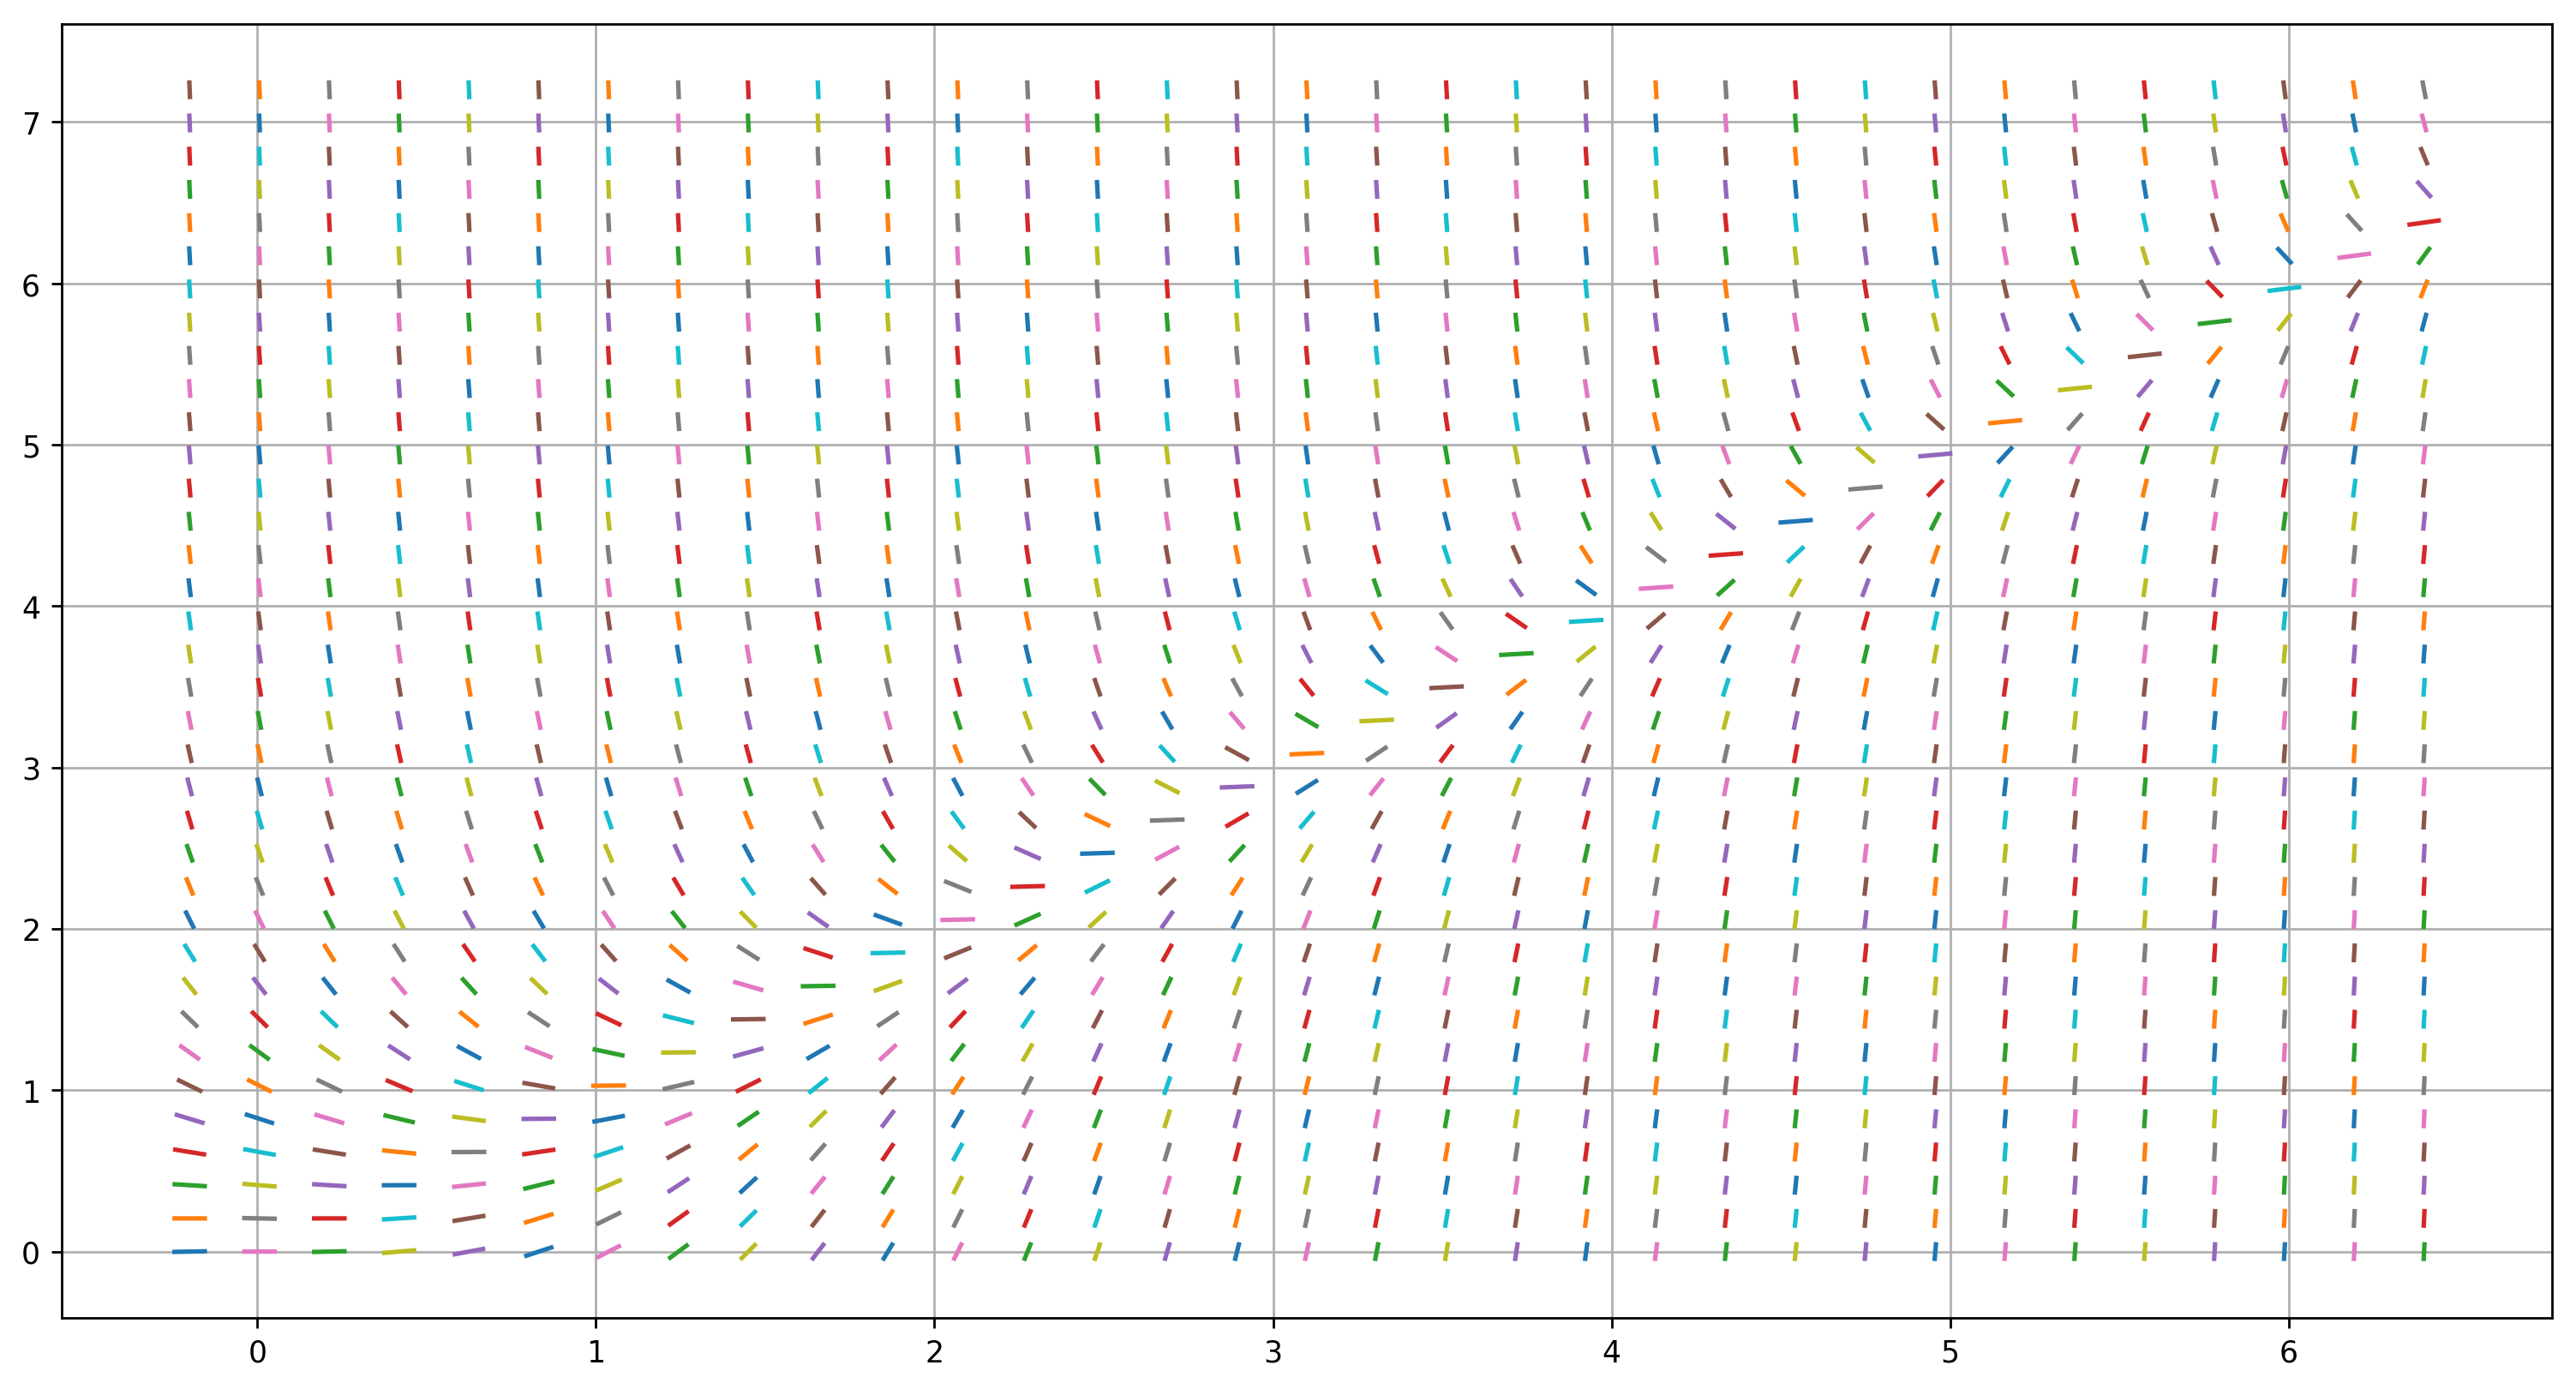

In [11]:
slope_field(dy_dx, x_bounds=[-0.2, 6.4], y_bounds=[0, 7.2], spacing=0.2)

Visually, the previously obtained solutions from __Part A__ fit very well in the above slope field. Should a line be mentally drawn starting at point (0, 1) and following the plotted slopes, then the solution is very clearly correct. It can also be seen that at larger y values, the 'line' where the slopes converge to goes from relatively in-line slopes (diagonally starting at (1, 1) and intersecting (3, ~2.8)) to very sharp slopes. This is in line with the observed numerical instability at these values.

## Problem 3

$$\frac{d}{dx}(Ky(x)\frac{dy}{dx})+N=0$$
Where y is the water depth (in meters), x is the horizontal distance (in meters), N is the infiltration rate (in meters per day), and K is the hydraulic conductivity of the aquifer (meters per day). We'll be supposing $K=1$, $N=0.002$ we're provided that $y(0)=20$ and $y(1500)=10$

### Part A

The given differential equation can be simplified as:
$$\frac{d}{dx}(y(x)\frac{dy(x)}{dx})=\frac{-N}{k}$$

$$y(x)\frac{d^2y(x)}{dx^2}+\frac{dy(x)}{dx}\frac{dy(x)}{dx}=\frac{-N}{k}$$

$$y(x)\frac{d^2y(x)}{dx^2}+(\frac{dy(x)}{dx})^2=\frac{-N}{k}$$
Rewrite the differential equation into the following form:
$$z(x)=\frac{dy(x)}{dx}, \frac{dz(x)}{dx}=\frac{d^2y(x)}{dx^2}$$
Thus the system can be represented by these two first-order ODEs:
$$z(x)=\frac{dy(x)}{dx}$$

$$\frac{dz(x)}{dx}=\frac{\frac{-N}{K}-z(x)^2}{y(x)}$$

### Part B

$$y(0)=20, y'(0)=\alpha$$

#### Implementation of the Runge-Kutta 4th order method

In [12]:
# Fourth-order Runge-Kutta method for two simultaneous ODEs
def runge_kutta4(dy_dx, dz_dx, initial=[0, 0], x_bounds=[0, 0], h=0.1):
    x, y = [initial[0]], [initial[1]]
    for i in range(1, int((x_bounds[1] - x_bounds[0]) / h) + 1):
        x_n, y_n = x[-1], y[-1] # t, y, z
        k1 = h * dy_dx(x_n, y_n)
        m1 = h * dz_dx(x_n, y_n)
        k2 = h * dy_dx(x_n + k1 / 2, y_n + m1 / 2)
        m2 = h * dz_dx(x_n + k1 / 2, y_n + m1 / 2)
        k3 = h * dy_dx(x_n + k2 / 2, y_n + m2 / 2)
        m3 = h * dz_dx(x_n + k2 / 2, y_n + m2 / 2)
        k4 = h * dy_dx(x_n + k3, y_n + m3)
        m4 = h * dz_dx(x_n + k3, y_n + m3)
        x.append(x_n + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        y.append(y_n + (m1 + 2 * m2 + 2 * m3 + m4) / 6)
        
    return x, y

#### Function implementation of the two first-order ODE's

In [13]:
def dy_dx(x, y): # u(x)
    return y

def d2y_dx2(x, y): # u'(x)
    N, K = 0.0002, 1
    if y > 10e30: # Avoid extremely large values of y
        return 10e30
    return ((-N/K - y ** 2) / x)

The above functions can be used to numerically solve the two first order ODEs given two initial conditions, one of which would be 20 and one of which is $\alpha$.

### Part C

In order to find the correct alpha value for these systems of differential equations, I will use a binary search algorithm that assumes the changes on the Runge-Kutta approximation of $y(x)$ is linearly related to the input $\alpha$ value. This is essential for the algorithm to work, because I will use this relationship to incrementally adjust the $\alpha$. If $y(1500)$ for the current alpha being tested is higher than 10 (the known result), then I will decrease it by half and try again. If the $y(1500)$ is _below_ 10 then it is instead increased by half. I will repeat this until 10 is matched with three decimal places.

#### Implementation of the binary search algorithm

In [14]:
# Implementation of a binary search algorithm for finding the correct alpha
# The two first order ODEs are used in an RK4 method to iteratively find the
# proper alpha value among the provided range. Trying to match y_real with the
# given tolerance. This method assumes the changes to the RK estimation of 
# y(x) is linearly proportional to the changes on alpha
def alpha_binary_search(dy_dx, dz_dx, y_real, initial=0, x_range=[0, 10],
                        x_step_size=1, alpha_range=[0, 1], tol=0.001, max_iters=1000):
    diff, iters, y_est = 1, 0, [-float("inf")]
    alpha = (alpha_range[1] - alpha_range[0]) / 2
    width = alpha
    # Search while the result is off by enough, max iters hasn't occurred
    # and the estimation is below the real value
    while True:
        y0_dy0 = [initial, alpha] # Array for y(0)=initial and y'(0)=alpha
        y_est, _ = runge_kutta4(dy_dx, dz_dx, y0_dy0, x_range, x_step_size)
        diff = abs(y_real - y_est[-1]) # How far off the estimation is
        print ("Alpha: %9.6f,\ty(1500): %.5f" % (alpha, y_est[-1]))
        # Check if the new estimate fits the exit conditions
        if (diff < tol or iters > max_iters) and (y_est[-1] > y_real):
            break
        
        # Adjust the alpha according to the estimate's relative difference
        if y_est[-1] > y_real:
            alpha = alpha - width / 2.0
        elif y_est[-1] < y_real:
            alpha = alpha + width / 2.0
            
        # Half the width each time, increment the iterations
        width /= 2.0
        iters += 1
        
    return y_est, alpha, iters

#### Use the binary search algorithm to find the alpha value that matches the given condition
I will be using a step size of 75 for the RK4 method so that numeric stability is preserved. Ideally a smaller step size would be used to ensure a more accurate result, but the problem requirement states a limited requirement for accuracy.

In [15]:
_, alpha, i = alpha_binary_search(dy_dx, d2y_dx2, y_real=10, initial=20,
                                  x_range=[0, 1500], x_step_size=75,
                                  alpha_range=[0, 100], tol=0.001)
print ("\nFound an alpha of %.6f, after %i iterations." % (alpha, i))

Alpha: 50.000000,	y(1500): 7530325144666815141508910187232100352.00000
Alpha: 25.000000,	y(1500): 6589240219362345509818200499882557440.00000
Alpha: 12.500000,	y(1500): 5656332808290053030214139594678468608.00000
Alpha:  6.250000,	y(1500): 4306259327736429587597257237950627840.00000
Alpha:  3.125000,	y(1500): 3059055851144424326418836468663320576.00000
Alpha:  1.562500,	y(1500): 11339092365329934405455388606044569600.00000
Alpha:  0.781250,	y(1500): 3321451425698408253588194370510651392.00000
Alpha:  0.390625,	y(1500): 122.20415
Alpha:  0.195312,	y(1500): 106.82599
Alpha:  0.097656,	y(1500): 76.17045
Alpha:  0.048828,	y(1500): 53.66049
Alpha:  0.024414,	y(1500): 37.61426
Alpha:  0.012207,	y(1500): 26.12319
Alpha:  0.006104,	y(1500): 17.78232
Alpha:  0.003052,	y(1500): 11.53726
Alpha:  0.001526,	y(1500): 6.45148
Alpha:  0.002289,	y(1500): 9.34556
Alpha:  0.002670,	y(1500): 10.49869
Alpha:  0.002480,	y(1500): 9.93883
Alpha:  0.002575,	y(1500): 10.22259
Alpha:  0.002527,	y(1500): 10.08171

#### Plot $y(x)$ with the previously found $\alpha$ of 0.0025

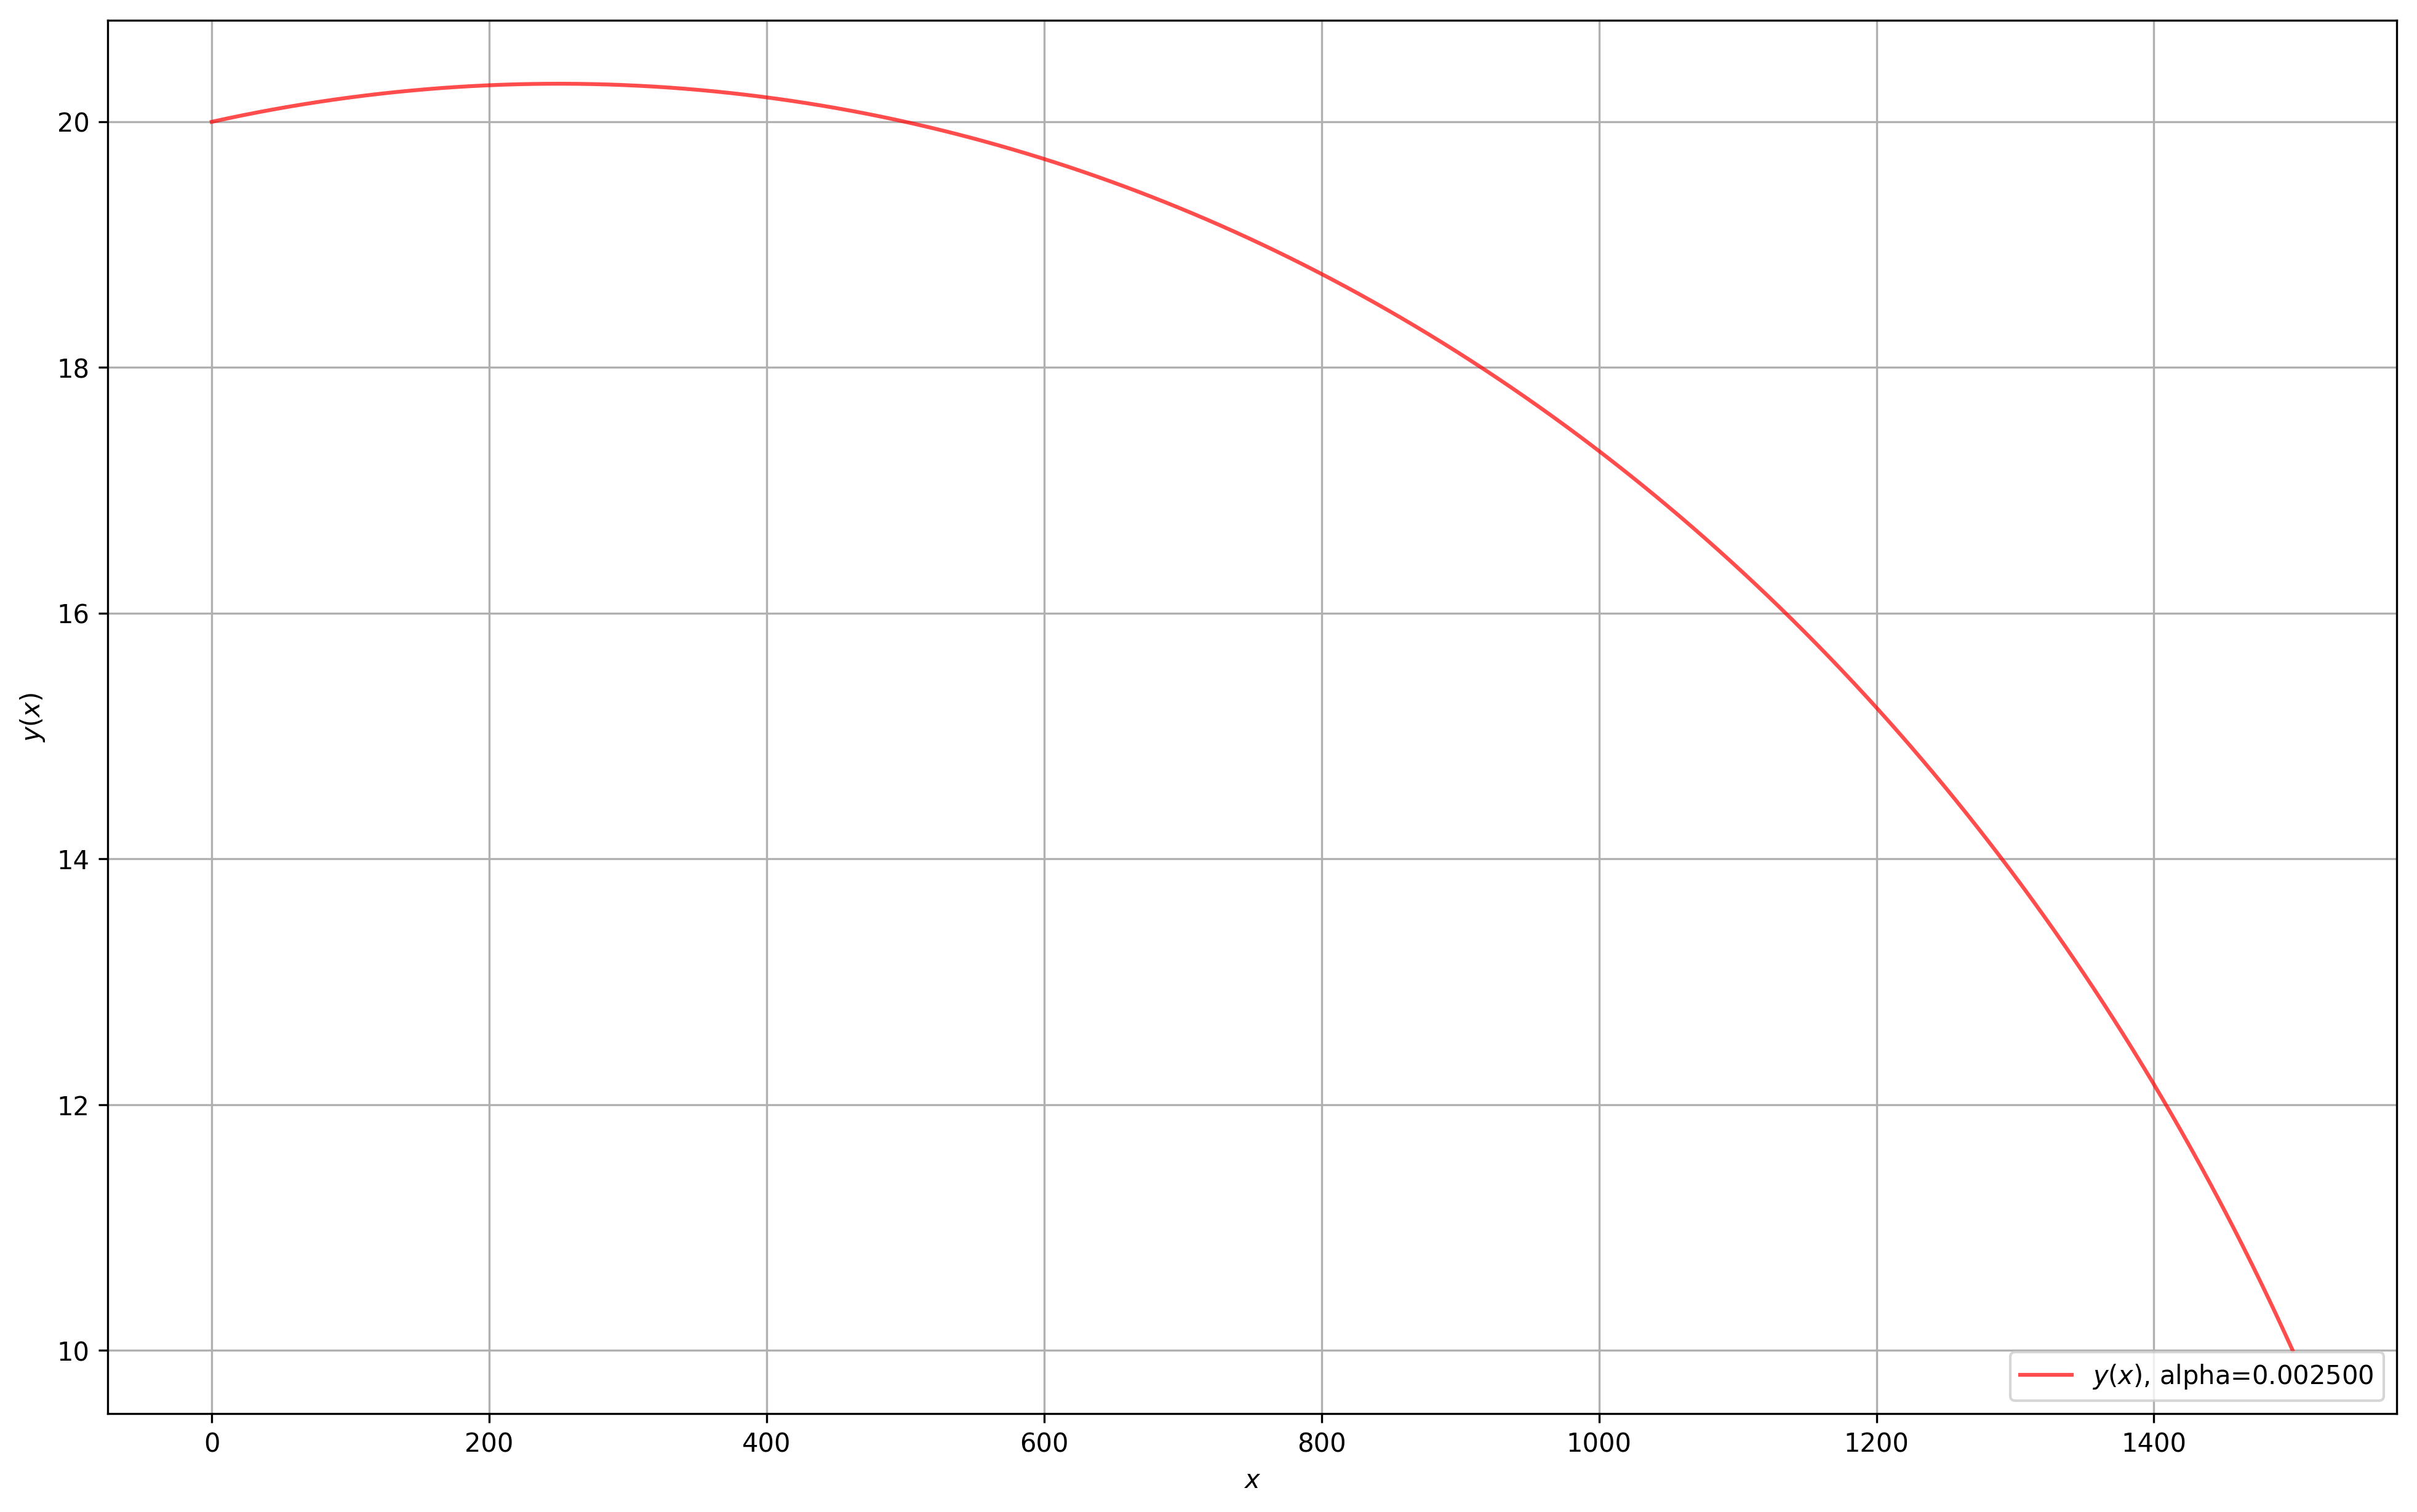

With an alpha of 0.002500, y(1500) is equal to 10.0001


In [16]:
y_est, _ = runge_kutta4(dy_dx, d2y_dx2, [20, alpha], [0, 1500], 1) # Compute y(x)
x_vals = np.arange(0, 1500 + 1, 1) # Generate the x-values between 0 and 1500
create_plot([x_vals], [(y_est, )], ["$x$"], ["$y(x)$"],
            [("$y(x)$, alpha=%f" % alpha, )], 1, size=(16, 10))
print ("With an alpha of %.6f, y(1500) is equal to %.4f" % (alpha, y_est[-1]))

### Part D
In order to identify the maximum water depth of $y(x)$ for the $\alpha$ previously found in __Part C__ to a precision of $\pm5$ meters, I will use the maximum possible step size of 10, as this means in the worst-case scenario the estimation will be at most five meters from the real valus (if it was exactly between two points). I'll then look at the results of the RK approximation of $y(x)$ and find the maximum value; specifically the maximum value in the RK results, and the distance will correspond to the index of that value in the x array.

In [17]:
y_est, _ = runge_kutta4(dy_dx, d2y_dx2, [20, alpha], [0, 1500], h=10) # y(x)
dist = np.arange(0, 1500 + 10, 10) # x
max_index = y_est.index(max(y_est)) # Find the index of the maximum water depth
print ("The maximum water depth is %.6f meters deep, at %.3f meters." %\
       (max(y_est), dist[max_index]))

The maximum water depth is 20.310106 meters deep, at 250.000 meters.
